###  Imports

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Import training Dataset of 5050 stars of which 37 have confirmed labelled exoplanets

In [2]:
df = pd.read_csv('exoTrain.csv')

In [3]:
df.shape

(5087, 3198)

### The Dataset contains 3197 columns of light intensity taken every 30 mins over 80 days

In [4]:
df.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


### EDA 

In [22]:
# Explore Star Light Intensity with & without exoPlanet
# remove the label data

# create dataset where LABEL = 2 
df_exo = df[df['LABEL']==2]
# create dataset where LABEL = 1
df_no_exo = df[df['LABEL']==1] 

In [23]:
# strip out the label column
df_exo = df_exo.iloc[:,1:]
df_no_exo = df_no_exo.iloc[:,1:]

In [61]:
#inspect the data- time stamps across the top
df_exo.head()

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,-160.17,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,-73.38,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,484.39,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,323.33,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,-970.88,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [98]:
#inspect the data- time stamps across the top
df_exo.shape

(37, 3197)

In [62]:
#inspect the data- time stamps across the top
df_no_exo.head()

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
37,-141.22,-81.79,-52.28,-32.45,-1.55,-35.61,-23.28,19.45,53.11,29.75,...,-50.79,-22.34,-36.23,27.44,13.52,38.66,-17.53,31.49,31.38,50.03
38,-35.62,-28.55,-27.29,-28.94,-15.13,-51.06,2.67,-5.21,9.67,7.87,...,-43.98,-38.22,-46.23,-54.40,-23.51,-26.96,-3.95,-0.34,10.52,-7.69
39,142.40,137.03,93.65,105.64,98.22,99.06,86.40,60.78,45.18,68.29,...,-0.99,-3.03,-30.27,-24.22,-35.10,-39.64,23.78,23.40,-0.50,0.97
40,-167.02,-137.65,-150.05,-136.85,-98.73,-103.14,-107.70,-123.19,-125.65,-119.86,...,-97.43,-79.79,-80.62,-78.22,-105.06,-69.67,-90.45,-73.67,-66.71,-66.07
41,207.74,223.60,246.15,224.06,210.77,189.56,172.68,170.31,148.79,181.26,...,-53.06,-136.92,-174.97,-180.46,-164.01,-126.58,84.05,63.81,108.36,78.10


## Plot the light intensity before normalization

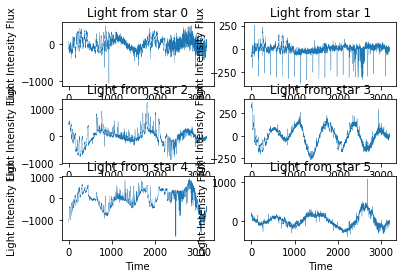

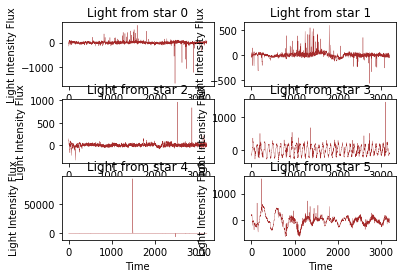

In [70]:
import matplotlib.pyplot as plt

#plot out the first 5 planets
for i in range(0,6):
    Y = df_exo.iloc[i]
    X = np.arange(len(Y)) 
    #plt.figure(figsize=(10,5))
    
    plt.subplot(3, 2, i+1)
    
    plt.ylabel('Light Intensity Flux')
    plt.xlabel('Time')
    plt.title('Light from star ' + str(i))
    plt.plot(X, Y, linewidth=.3)

plt.show()    
for i in range(0,6):
    Y = df_no_exo.iloc[i]
    X = np.arange(len(Y)) 
    #plt.figure(figsize=(10,5))
    
    plt.subplot(3, 2, i+1)
    
    plt.ylabel('Light Intensity Flux')
    plt.xlabel('Time')
    plt.title('Light from star ' + str(i))
    plt.plot(X, Y, linewidth=.3,color='brown')
    
plt.show()

## Normalize using standard scaler to account for star size, distance and brightness

In [25]:
# import and instatiate scaler
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [21]:
#or 
import pandas as pd
from sklearn import preprocessing

#normalize the columns:
#instatiate the normalizer
min_max_scaler = preprocessing.MinMaxScaler()

#fit transform the dataframe -> result is a matrix
np_scaled = min_max_scaler.fit_transform(df)

#convert the matrix back into a dataframe & inspect
df_normalized = pd.DataFrame(np_scaled)
df_normalized.head()

,0,1,2,3,4,5,6,7,8,9,...,3188,3189,3190,3191,3192,3193,3194,3195,3196,3197
0,1.0,0.136735,0.178387,0.162073,0.135268,0.218783,0.283719,0.314417,0.290062,0.228302,...,0.154023,0.113441,0.089247,0.076333,0.086317,0.122107,0.728771,0.772241,0.771529,0.752664
1,1.0,0.136655,0.178321,0.162028,0.135260,0.218763,0.283743,0.314439,0.290067,0.228299,...,0.154059,0.113467,0.089269,0.076319,0.086303,0.122085,0.728723,0.772183,0.771541,0.752734
2,1.0,0.136998,0.178643,0.162355,0.135570,0.219040,0.283999,0.314697,0.290354,0.228599,...,0.154026,0.113484,0.089283,0.076318,0.086298,0.122086,0.728723,0.772146,0.771446,0.752597
3,1.0,0.136874,0.178536,0.162234,0.135455,0.218968,0.283926,0.314631,0.290266,0.228527,...,0.154063,0.113478,0.089277,0.076334,0.086309,0.122082,0.728726,0.772158,0.771504,0.752727
4,1.0,0.136014,0.177711,0.161423,0.134650,0.218257,0.283286,0.314013,0.289598,0.227779,...,0.153778,0.113330,0.089156,0.076230,0.086187,0.121978,0.728359,0.771770,0.771070,0.752113


## fit and transform normalizer

In [26]:
df_no_exo_scale = scale.fit_transform(df_no_exo.as_matrix())
df_exo_scale = scale.fit_transform(df_exo.as_matrix())

## convert matrices back into dataframe

In [28]:
df_no_exo_scale = pd.DataFrame(df_no_exo_scale)
df_exo_scale = pd.DataFrame(df_exo_scale)

In [37]:
df_no_exo_scale.shape

(5050, 3197)

In [38]:
df_exo_scale.shape

(37, 3197)

## Plot light intensity with normalized values

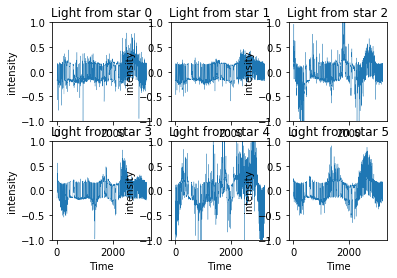

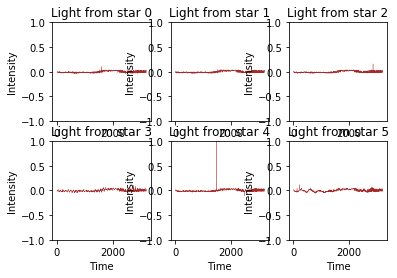

In [31]:
#plot out the first 5 planets
for i in range(0,6):
    Y = df_exo_scale.iloc[i]
    X = np.arange(len(Y)) 
    #plt.figure(figsize=(10,5))
    
    plt.subplot(2, 3, i+1)
    plt.ylim(-1,1)
    plt.ylabel('intensity')
    plt.xlabel('Time')
    plt.title('Light from star ' + str(i))
    plt.plot(X, Y, linewidth=.3)
plt.show()
    
for i in range(0,6):
    Y = df_no_exo_scale.iloc[i]
    X = np.arange(len(Y)) 
    #plt.figure(figsize=(10,5))
    
    plt.subplot(2, 3, i+1)
    plt.ylim(-1,1)
    plt.ylabel('Intensity')
    plt.xlabel('Time')
    plt.title('Light from star ' + str(i))
    plt.plot(X, Y, linewidth=.3,color='brown')
    
plt.show()

In [52]:
df_exo_scale.head()

,0,1,2,3,4,5,6,7,8,9,...,3187,3188,3189,3190,3191,3192,3193,3194,3195,3196
0,-0.163767,-0.163711,-0.165949,-0.168543,-0.170081,-0.180140,-0.181709,-0.185797,-0.167415,0.100833,...,0.087759,0.141707,0.149662,0.167678,0.171654,0.175930,-0.033363,-0.153647,-0.184936,-0.190644
1,-0.169197,-0.169309,-0.170692,-0.169525,-0.173685,-0.173500,-0.174721,-0.182307,-0.172801,0.142521,...,0.124632,0.159828,0.162383,0.158110,0.157832,0.135933,-0.089757,-0.184416,-0.182118,-0.179853
2,-0.145816,-0.142198,-0.136172,-0.129299,-0.125111,-0.104560,-0.095537,0.000069,0.514442,0.410431,...,0.090904,0.171622,0.170662,0.157154,0.153688,0.137807,-0.089868,-0.204217,-0.204316,-0.201010
3,-0.154249,-0.151169,-0.148923,-0.144190,-0.137687,-0.124175,-0.115966,-0.055781,0.350543,0.333070,...,0.129064,0.167207,0.167563,0.168619,0.164271,0.130081,-0.086518,-0.197723,-0.190724,-0.180933
4,-0.212902,-0.220641,-0.234658,-0.248553,-0.262376,-0.296543,-0.305741,-0.481326,-1.368443,-0.288570,...,-0.166785,0.064106,0.095188,0.094538,0.044293,-0.055509,-0.518634,-0.403373,-0.292511,-0.276104


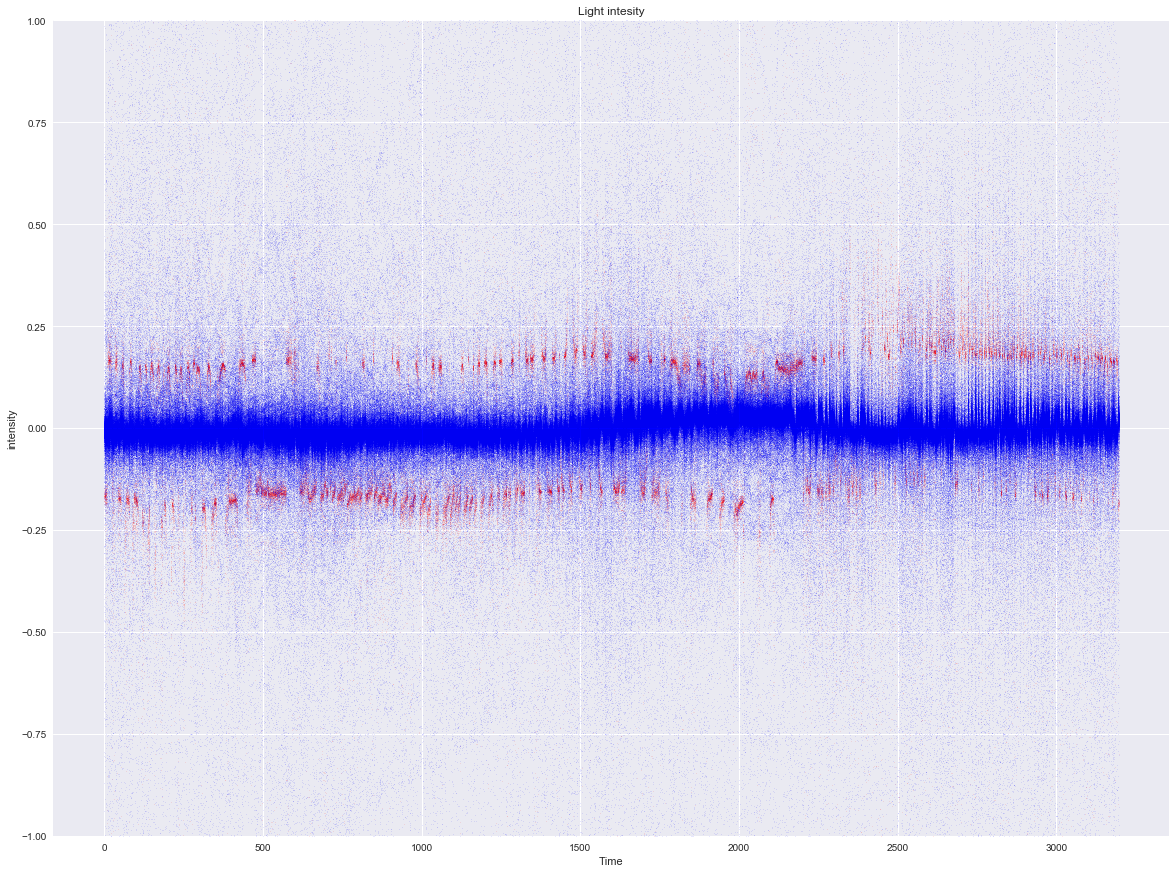

In [73]:
plt.figure(figsize=(20,15))
for i in range(0, 38 ):
    Y = df_exo_scale.iloc[i]
    X = np.arange(len(Y)) 
   
    
    plt.ylim(-1,1)
    plt.ylabel('intensity')
    plt.xlabel('Time')
    plt.title('Light intesity')
    plt.scatter(X, Y, s= 0.15, alpha=.2, color= 'red')

for i in range(0, 5000 ):
    Y = df_no_exo_scale.iloc[i]
    X = np.arange(len(Y)) 
   
    
    plt.ylim(-1,1)
    plt.ylabel('intensity')
    plt.xlabel('Time')
    plt.title('Light intesity')
    plt.scatter(X, Y, s= 0.15, alpha=.2, color ='blue')

plt.show()

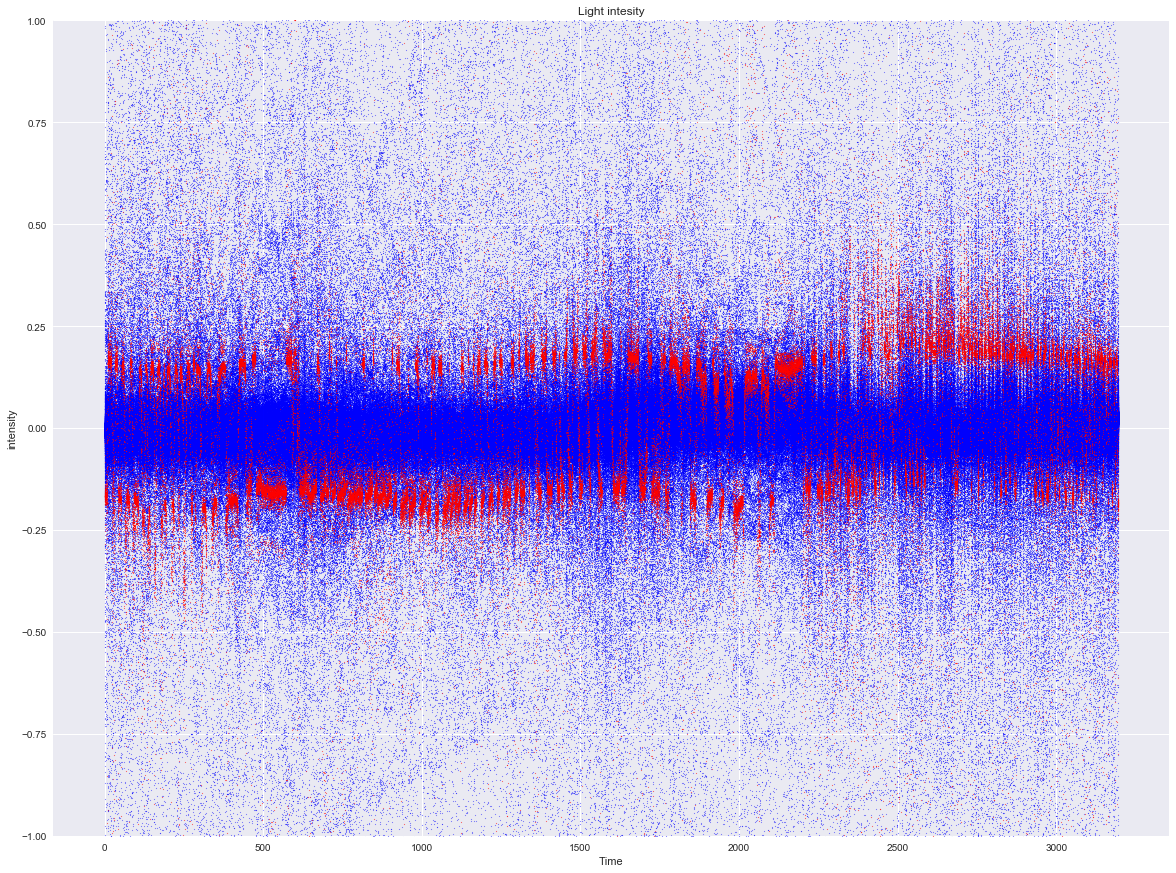

In [85]:
plt.figure(figsize=(20,15))
for i in range(0, 5000 ):
    Y = df_no_exo_scale.iloc[i]
    X = np.arange(len(Y)) 
   
    
    plt.ylim(-1,1)
    plt.ylabel('intensity')
    plt.xlabel('Time')
    plt.title('Light intesity')
    plt.scatter(X, Y, s= 0.8, alpha=.4, color ='blue')
    
for i in range(0, 37 ):
    Y = df_exo_scale.iloc[i]
    X = np.arange(len(Y)) 
   

    plt.ylim(-1,1)
    plt.ylabel('intensity')
    plt.xlabel('Time')
    plt.title('Light intesity')
    plt.scatter(X, Y, s= 0.8, alpha=.5, color= 'red')


plt.show()

## Look at the distributions of intensity for stars with transit- notice two peaks

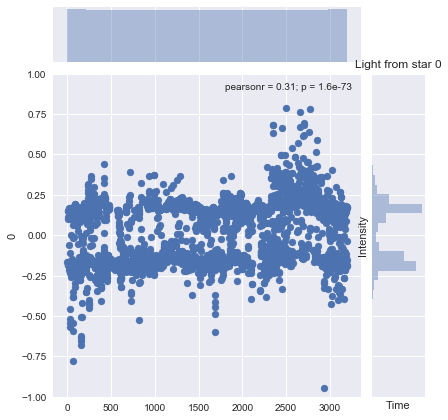

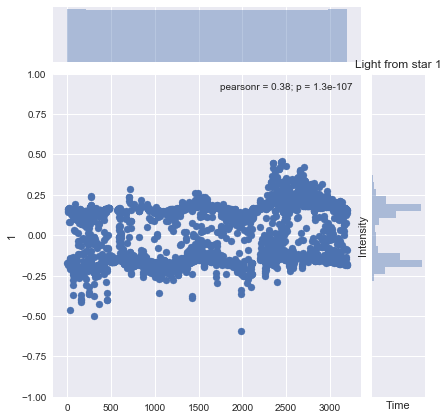

In [40]:
for i in range(0,2):
    Y = df_exo_scale.iloc[i]
    X = np.arange(len(Y)) 
    #plt.figure(figsize=(10,5))
    
   # plt.subplot(2, 1, i+1)
    sns.jointplot(x=X, y=Y)
    plt.ylim(-1,1)
    plt.ylabel('Intensity')
    plt.xlabel('Time')
    plt.title('Light from star ' + str(i))
    
#    plt.plot(X, Y, linewidth=.3,color='brown')
    
plt.show()


## how do the distributions look for stars without transit - single peak

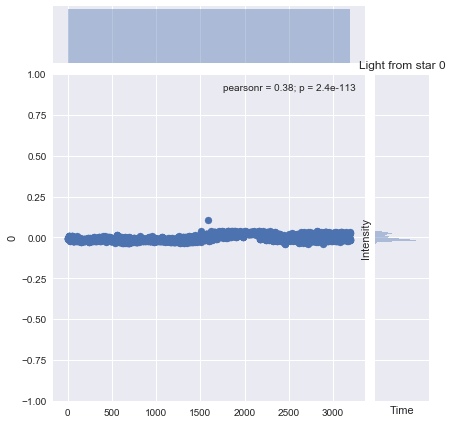

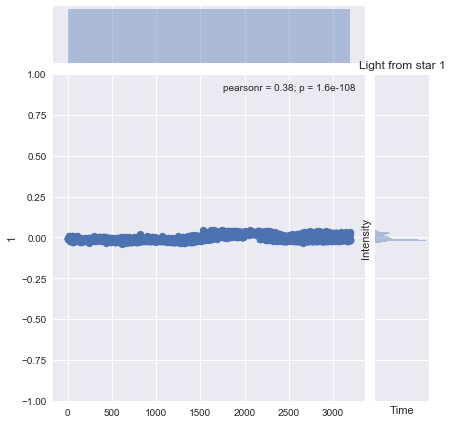

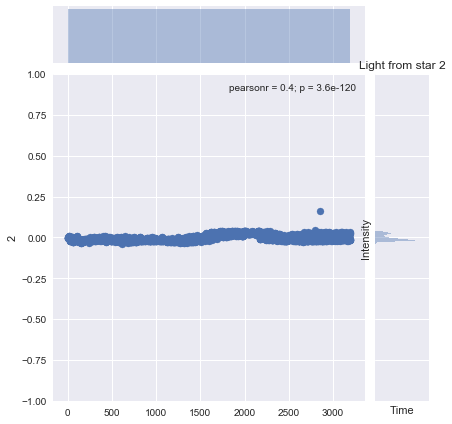

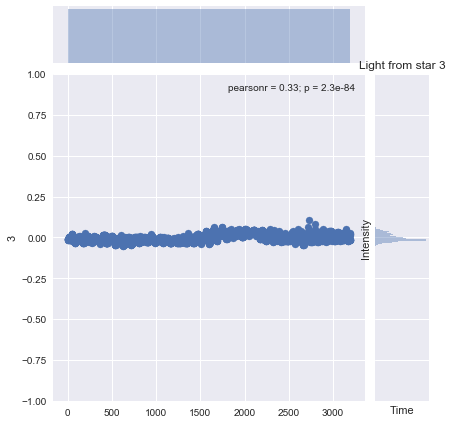

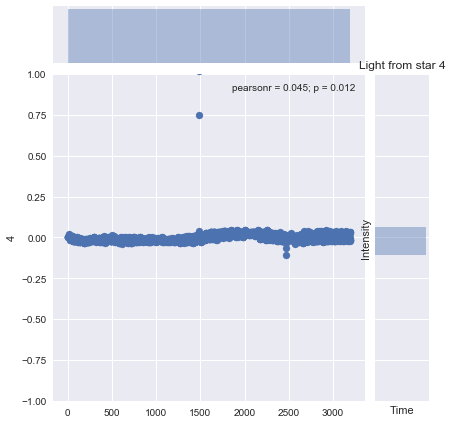

In [89]:
for i in range(0,5):
    Y = df_no_exo_scale.iloc[i]
    X = np.arange(len(Y)) 
    #plt.figure(figsize=(10,5))
    
   # plt.subplot(5, 1, i+1)
    sns.jointplot(x=X, y=Y)
    plt.ylim(-1,1)
    plt.ylabel('Intensity')
    plt.xlabel('Time')
    plt.title('Light from star ' + str(i))
    
#    plt.plot(X, Y, linewidth=.3,color='brown')
    
plt.show()


In [50]:
df_exo_scale.head()

,0,1,2,3,4,5,6,7,8,9,...,3187,3188,3189,3190,3191,3192,3193,3194,3195,3196
0,-0.163767,-0.163711,-0.165949,-0.168543,-0.170081,-0.180140,-0.181709,-0.185797,-0.167415,0.100833,...,0.087759,0.141707,0.149662,0.167678,0.171654,0.175930,-0.033363,-0.153647,-0.184936,-0.190644
1,-0.169197,-0.169309,-0.170692,-0.169525,-0.173685,-0.173500,-0.174721,-0.182307,-0.172801,0.142521,...,0.124632,0.159828,0.162383,0.158110,0.157832,0.135933,-0.089757,-0.184416,-0.182118,-0.179853
2,-0.145816,-0.142198,-0.136172,-0.129299,-0.125111,-0.104560,-0.095537,0.000069,0.514442,0.410431,...,0.090904,0.171622,0.170662,0.157154,0.153688,0.137807,-0.089868,-0.204217,-0.204316,-0.201010
3,-0.154249,-0.151169,-0.148923,-0.144190,-0.137687,-0.124175,-0.115966,-0.055781,0.350543,0.333070,...,0.129064,0.167207,0.167563,0.168619,0.164271,0.130081,-0.086518,-0.197723,-0.190724,-0.180933
4,-0.212902,-0.220641,-0.234658,-0.248553,-0.262376,-0.296543,-0.305741,-0.481326,-1.368443,-0.288570,...,-0.166785,0.064106,0.095188,0.094538,0.044293,-0.055509,-0.518634,-0.403373,-0.292511,-0.276104


## Exploring the distributions

In [91]:
from scipy import stats, integrate
import seaborn as sns
sns.set(color_codes=True)

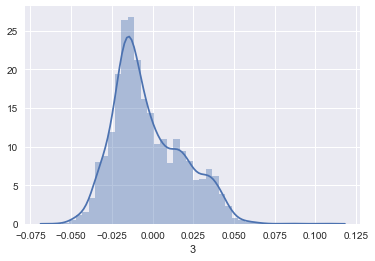

In [92]:
x = df_no_exo_scale.iloc[3]
sns.distplot(x);

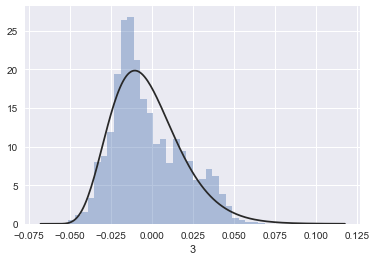

In [93]:
sns.distplot(x, kde=False, fit=stats.gamma);

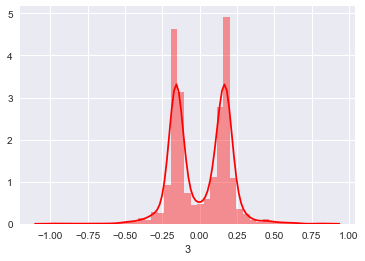

In [99]:
x = df_exo_scale.iloc[3]
sns.distplot(x, color='red');

## Looking at the intensity with KDE : no exoplanet

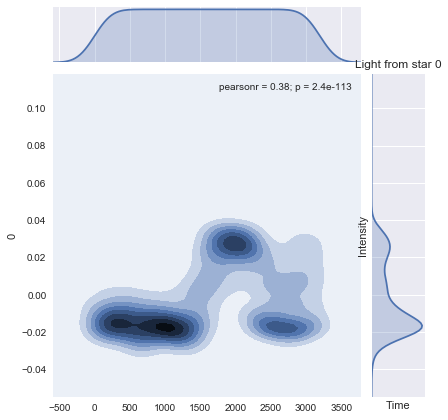

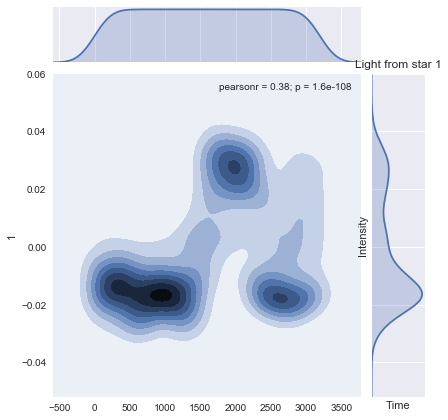

In [97]:
for i in range(0,2):
    Y = df_no_exo_scale.iloc[i]
    X = np.arange(len(Y)) 
    #plt.figure(figsize=(10,5))
    
   # plt.subplot(5, 1, i+1)
    sns.jointplot(x=X, y=Y,kind = 'kde')
    #plt.ylim(-1,1)
    plt.ylabel('Intensity')
    plt.xlabel('Time')
    plt.title('Light from star ' + str(i))
    

## Looking at the intensity with KDE : YES exoplanet

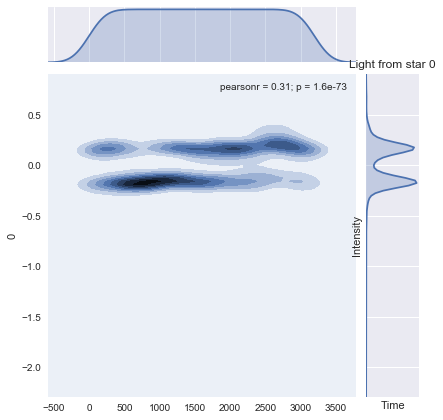

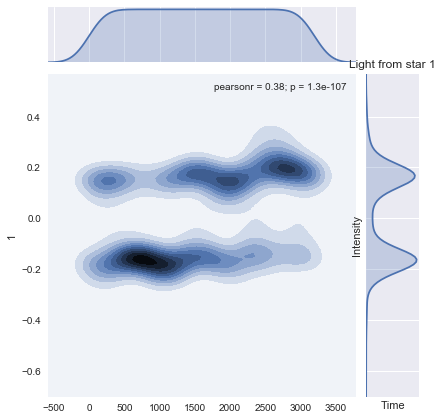

In [98]:
for i in range(0,2):
    Y = df_exo_scale.iloc[i]
    X = np.arange(len(Y)) 
    #plt.figure(figsize=(10,5))
    
   # plt.subplot(5, 1, i+1)
    sns.jointplot(x=X, y=Y,kind = 'kde')
    #plt.ylim(-1,1)
    plt.ylabel('Intensity')
    plt.xlabel('Time')
    plt.title('Light from star ' + str(i))

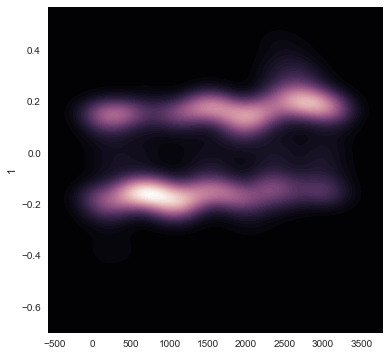

In [104]:
y = df_exo_scale.iloc[1]
x = np.arange(len(y)) 

f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(x, y, cmap=cmap, n_levels=60, shade=True);

# Work in Progress:

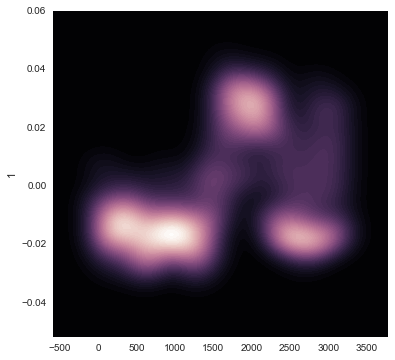

In [103]:
y = df_no_exo_scale.iloc[1]
x = np.arange(len(y)) 

f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(x, y, cmap=cmap, n_levels=60, shade=True);

In [5]:
import plotly.plotly as py
import cufflinks as cf

cf.set_config_file(offline=False, world_readable=True, theme='ggplot')

In [24]:
one_planet = df.iloc[0,1:]
one_planet = pd.DataFrame(one_planet).reset_index()

In [105]:
one_planet.iplot(x='index',kind='scatter') 

NameError: name 'one_planet' is not defined

In [28]:
one_planet = df.iloc[2,1:]
one_planet = pd.DataFrame(one_planet).reset_index()
one_planet.iplot(x='index',kind='scatter') 

In [29]:
one_planet = df.iloc[-1,1:]
one_planet = pd.DataFrame(one_planet).reset_index()
one_planet.iplot(x='index',kind='scatter') 

In [30]:
one_planet = df.iloc[-2,1:]
one_planet = pd.DataFrame(one_planet).reset_index()
one_planet.iplot(x='index',kind='scatter') 

In [31]:
one_planet = df.iloc[400,1:]
one_planet = pd.DataFrame(one_planet).reset_index()
one_planet.iplot(x='index',kind='scatter') 

In [47]:
one_planet = df.iloc[36,1:]
one_planet = pd.DataFrame(one_planet).reset_index()
one_planet.iplot(x='index',kind='scatter') 

In [13]:
newdf.head()

,0,1,2,3,4,5,6,7,8,9,...,5077,5078,5079,5080,5081,5082,5083,5084,5085,5086
LABEL,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
FLUX.1,93.85,-38.88,532.64,326.52,-1107.21,211.10,9.34,238.77,-103.54,-265.91,...,125.57,7.45,475.61,-46.63,299.41,-91.91,989.75,273.39,3.82,323.28
FLUX.2,83.81,-33.83,535.92,347.39,-1112.59,163.57,49.96,262.16,-118.97,-318.59,...,78.69,10.02,395.50,-55.39,302.77,-92.97,891.01,278.00,2.09,306.36
FLUX.3,20.10,-58.54,513.73,302.35,-1118.95,179.16,33.30,277.80,-108.93,-335.66,...,98.29,6.87,423.61,-64.88,278.68,-78.76,908.53,261.73,-3.29,293.16
FLUX.4,-26.98,-40.09,496.92,298.13,-1095.10,187.82,9.63,190.16,-72.25,-450.47,...,91.16,-2.82,376.36,-88.75,263.48,-97.33,851.83,236.99,-2.88,287.67


In [12]:
newdf = df.T

In [17]:
#create seperate row of planets labels
labeldf= newdf.loc['LABEL']

In [22]:
#create database of just time data
timedf = newdf.iloc[1:]

In [28]:
timedf.reset_index(level=0, inplace=True)

In [29]:
timedf.head()

,index,0,1,2,3,4,5,6,7,8,...,5077,5078,5079,5080,5081,5082,5083,5084,5085,5086
0,FLUX.1,93.85,-38.88,532.64,326.52,-1107.21,211.10,9.34,238.77,-103.54,...,125.57,7.45,475.61,-46.63,299.41,-91.91,989.75,273.39,3.82,323.28
1,FLUX.2,83.81,-33.83,535.92,347.39,-1112.59,163.57,49.96,262.16,-118.97,...,78.69,10.02,395.50,-55.39,302.77,-92.97,891.01,278.00,2.09,306.36
2,FLUX.3,20.10,-58.54,513.73,302.35,-1118.95,179.16,33.30,277.80,-108.93,...,98.29,6.87,423.61,-64.88,278.68,-78.76,908.53,261.73,-3.29,293.16
3,FLUX.4,-26.98,-40.09,496.92,298.13,-1095.10,187.82,9.63,190.16,-72.25,...,91.16,-2.82,376.36,-88.75,263.48,-97.33,851.83,236.99,-2.88,287.67
4,FLUX.5,-39.56,-79.31,456.45,317.74,-1057.55,188.46,37.64,180.98,-61.46,...,78.42,-1.56,338.94,-75.40,236.89,-68.00,755.11,280.73,1.66,249.89


In [40]:
timedf_short = timedf.iloc[:,:8]

In [41]:
timedf_short.head()

,index,0,1,2,3,4,5,6
0,FLUX.1,93.85,-38.88,532.64,326.52,-1107.21,211.10,9.34
1,FLUX.2,83.81,-33.83,535.92,347.39,-1112.59,163.57,49.96
2,FLUX.3,20.10,-58.54,513.73,302.35,-1118.95,179.16,33.30
3,FLUX.4,-26.98,-40.09,496.92,298.13,-1095.10,187.82,9.63
4,FLUX.5,-39.56,-79.31,456.45,317.74,-1057.55,188.46,37.64


In [60]:
timedf_short.head()

,star_1,star_2,star_3,star_4,star_5,star_6,star_7,star_8
0,FLUX.1,93.85,-38.88,532.64,326.52,-1107.21,211.10,9.34
1,FLUX.2,83.81,-33.83,535.92,347.39,-1112.59,163.57,49.96
2,FLUX.3,20.10,-58.54,513.73,302.35,-1118.95,179.16,33.30
3,FLUX.4,-26.98,-40.09,496.92,298.13,-1095.10,187.82,9.63
4,FLUX.5,-39.56,-79.31,456.45,317.74,-1057.55,188.46,37.64


In [58]:
star_alias = []
for i in range(1,9):
    star_alias.append('star_' + str(i))

In [59]:
timedf_short.columns = star_alias 

In [61]:
star_alias

['star_1',
 'star_2',
 'star_3',
 'star_4',
 'star_5',
 'star_6',
 'star_7',
 'star_8']

In [70]:
star_alias_7 = star_alias[1:8]

In [71]:
star_alias_7

['star_2', 'star_3', 'star_4', 'star_5', 'star_6', 'star_7', 'star_8']

In [72]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [73]:
timedf_short[star_alias_7] = scaler.fit_transform(timedf_short[star_alias_7].as_matrix())

In [75]:
cf.set_config_file(offline=False, world_readable=True, theme='ggplot')

timedf_short.iplot(x='star_1',kind='scatter') 